## This is a customed caffe tutorial

### Blob storage and communication 
Mathematically, a blob is an N-dimensional array stored in a C-contiguous fashion.

实际上是一个n维的数组，存储形式为C-contiguous（https://stackoverflow.com/questions/37597814/what-does-c-contiguous-fashion-mean-in-caffe-blob-storage）

Caffe stores and communicates data using blobs. Blobs provide a unified memory interface holding data; e.g., batches of images, model parameters, and derivatives for optimization.

caffe用blob存储和传输数据。blob提供了一个统一的内存交互来存储数据，比如图片组，模型参数以及优化导数。

The conventional blob dimensions for batches of image data are number N x channel K x height H x width W. 

一组图片数据的原始blob维数为number N x channel K x height H x width W

Blob memory is row-major in layout, so the last / rightmost dimension changes fastest. 

这句话没看明白

For example, in a 4D blob, the value at index (n, k, h, w) is physically located at index 
((n * K + k) * H + h) * W + w.

其中N为batch size， K为特征的维数/图片的通道数。

### Layer computation and connections

A layer takes input through bottom connections and makes output through top connections.

输入从底层连接经过层，然后从顶层连接从层中输出。

Each layer type defines three critical computations: setup, forward, and backward.

每一种层都定义了三种关键的计算：设置，前向传播，反向传播。

Setup: initialize the layer and its connections once at model initialization.

设置：在模型初始化阶段初始化层及其连接

Forward: given input from bottom compute the output and send to the top.

前向传播：给定输入计算输出，从底层向顶层传播

Backward: given the gradient w.r.t. the top output compute the gradient w.r.t. to the input and send to the bottom. A layer with parameters computes the gradient w.r.t. to its parameters and stores it internally.

反向传播：给定相对于输出的梯度计算相对于输入的梯度，并将其送到底层。有参数的层会计算相对于参数的梯度，并将其存储起来

### Net definition and operation

A typical net begins with a data layer that loads from disk and ends with a loss layer that computes the objective for a task such as classification or reconstruction.

一个典型的网络从数据层开始，该数据层从硬盘上加载数据，以损失层结束，该损失层为分类或其他任务中的目标计算损失

The net is defined as a set of layers and their connections in a plaintext modeling language. A simple logistic regression classifier

网络是用一种plaintext的模型语言来定义的。下面展示一个简单的逻辑回归模型

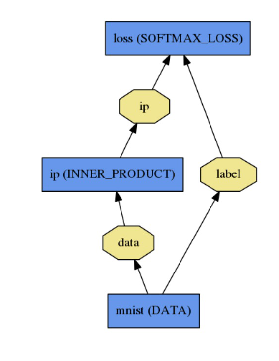

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('./pics/logreg.jpg')
plt.figure(figsize=(6,6))
plt.imshow(img)
plt.axis('off')
plt.show()

上面的简单网络，定义方式如下：

name: "LogReg" 

layer {

  name: "mnist"
  
  type: "Data"
  
  top: "data"
  
  top: "label"
  
  data_param {
  
    source: "input_leveldb"
    
    batch_size: 64
    
  }
  
}

layer {

  name: "ip"
  
  type: "InnerProduct"
  
  bottom: "data"
  
  top: "ip"
  
  inner_product_param {
  
    num_output: 2
    
  }
  
}

layer {

  name: "loss"
  
  type: "SoftmaxWithLoss"
  
  bottom: "ip"
  
  bottom: "label"
  
  top: "loss"
  
}